In [1]:
import os
import glob

import numpy as np
import scikit_posthocs as sp
import scipy.stats as ss
import pandas as pd
from autorank import autorank, create_report, plot_stats
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec

In [2]:
df = pd.read_csv('full_results.csv')
name_nicely = {
    "banknote": "Banknote",
    "breastcancer": "BrCancer",
    "cifar10": "CIFAR-10",
    "htru2": "HTRU2",
    "mnist": "MNIST",
    "dnn": "DNN",
    "resnet": "ResNet",
    "svm": "SVM",
    "tree": "Tree",
    "vgg": "VGG",
    "baard": "BAARD",
    "fs": "FS",
    "lid": "LID",
    "magnet": "MagNet",
    "rc": "RC"
}
df['defence'] = df['defence'].map(name_nicely)
df['data'] = df['data'].map(name_nicely)
df['model'] = df['model'].map(name_nicely)

In [3]:
df1 = df.groupby(['data', 'model', 'attack', 'adv_param', 'defence'], as_index=False).agg({
        'acc_on_adv': ['mean'],
        'fpr': ['mean']
})
df1.columns = [x[0] for x in df1.columns]

In [4]:
df1.head()

,data,model,attack,adv_param,defence,acc_on_adv,fpr
0,Banknote,DNN,apgd,0.05,BAARD,0.934231,0.019478
1,Banknote,DNN,apgd,0.05,LID,0.861136,0.082222
2,Banknote,DNN,apgd,0.05,MagNet,0.629780,0.003077
3,Banknote,DNN,apgd,0.05,RC,0.771897,0.001010
4,Banknote,DNN,apgd,0.10,BAARD,0.674106,0.019478


## Group by attacks

In [5]:
# attacks = df['attack'].unique()
# ['apgd', 'apgd2', 'cw2', 'fgsm', 'bim', 'boundary', 'tree', 'deepfool', 'line']
# L-inf: apgd, fgsm, bim
# L-2: apgd2, cw2, boundary, deepfool
attacks = ['apgd', 'apgd2', 'cw2', 'fgsm']

/home/xcha011/.local/lib/python3.6/site-packages/autorank/_util.py:107: RuntimeWarning: invalid value encountered in double_scalars
  return (np.median(x) - np.median(y)) / _pooled_mad(x, y)
/home/xcha011/.local/lib/python3.6/site-packages/autorank/_util.py:107: RuntimeWarning: divide by zero encountered in double_scalars
  return (np.median(x) - np.median(y)) / _pooled_mad(x, y)
/home/xcha011/.local/lib/python3.6/site-packages/autorank/_util.py:107: RuntimeWarning: invalid value encountered in double_scalars
  return (np.median(x) - np.median(y)) / _pooled_mad(x, y)


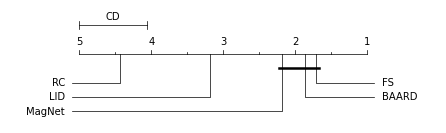

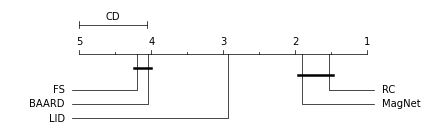

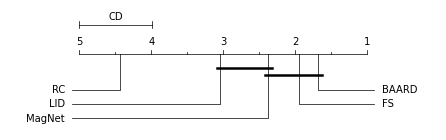

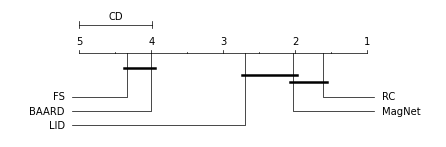

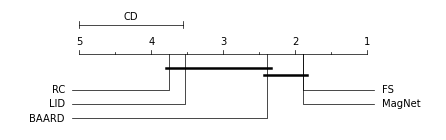

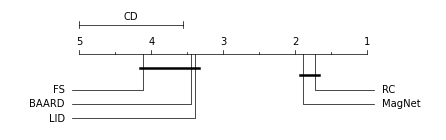

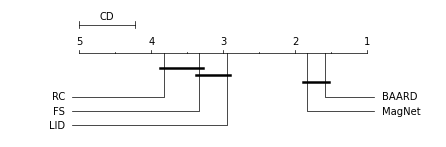

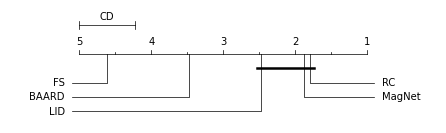

In [6]:
for att in attacks:
    data = df1[df1['attack'] == att]
    acc = pd.concat(
        {d: a.reset_index(drop=True) for d, a in data.groupby('defence')['acc_on_adv']},
        axis=1
    )
    res_acc = autorank(acc)
    plot_stats(res_acc)
    plt.savefig('nemenyi_acc_{}.pdf'.format(att), format='pdf', dpi=1200, bbox_inches='tight')

    fpr = pd.concat(
        {d: a.reset_index(drop=True) for d, a in data.groupby('defence')['fpr']},
        axis=1
    )
    res_fpr = autorank(fpr, order='ascending')
    plot_stats(res_fpr)
    plt.savefig('nemenyi_fpr_{}.pdf'.format(att), format='pdf', dpi=1200, bbox_inches='tight')

/home/xcha011/.local/lib/python3.6/site-packages/autorank/_util.py:107: RuntimeWarning: invalid value encountered in double_scalars
  return (np.median(x) - np.median(y)) / _pooled_mad(x, y)
/home/xcha011/.local/lib/python3.6/site-packages/autorank/_util.py:107: RuntimeWarning: divide by zero encountered in double_scalars
  return (np.median(x) - np.median(y)) / _pooled_mad(x, y)


,data,model,attack,adv_param,defence,acc_on_adv,fpr
286,CIFAR-10,ResNet,apgd,0.031,BAARD,0.1566,0.0588
287,CIFAR-10,ResNet,apgd,0.031,FS,0.9034,0.0612
288,CIFAR-10,ResNet,apgd,0.031,LID,0.0334,0.0136
289,CIFAR-10,ResNet,apgd,0.031,MagNet,0.2292,0.0020
290,CIFAR-10,ResNet,apgd,0.031,RC,0.0016,0.0030
...,...,...,...,...,...,...,...
709,MNIST,DNN,apgd,2.000,BAARD,1.0000,0.0272
710,MNIST,DNN,apgd,2.000,FS,0.7854,0.0528
711,MNIST,DNN,apgd,2.000,LID,0.3844,0.0064
712,MNIST,DNN,apgd,2.000,MagNet,1.0000,0.0028


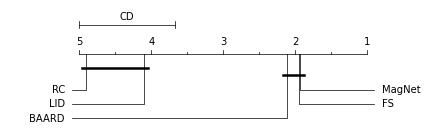

In [25]:
# L-inf: apgd, fgsm, bim

data = df1[((df1['attack'] == 'apgd') | (df2['attack'] == 'fgsm')) & ((df1['data'] == 'MNIST') | (df1['data'] == 'CIFAR-10'))]
acc = pd.concat(
    {d: a.reset_index(drop=True) for d, a in data.groupby('defence')['acc_on_adv']},
    axis=1
)
res_acc = autorank(acc)
plot_stats(res_acc)
plt.savefig('nemenyi_acc_linf_img.pdf', format='pdf', dpi=1200, bbox_inches='tight')

data


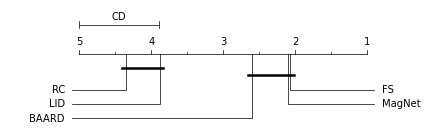

In [24]:
data = df1[((df1['attack'] == 'apgd2') | (df1['attack'] == 'cw2') | (df1['attack'] == 'boundary')  | (df1['attack'] == 'deepfool')) & ((df1['data'] == 'MNIST') | (df1['data'] == 'CIFAR-10'))]
acc = pd.concat(
    {d: a.reset_index(drop=True) for d, a in data.groupby('defence')['acc_on_adv']},
    axis=1
)
res_acc = autorank(acc)
plot_stats(res_acc)
plt.savefig('nemenyi_acc_l2_img.pdf', format='pdf', dpi=1200, bbox_inches='tight')

In [7]:
df2 = df.groupby(['data', 'model', 'attack', 'defence'], as_index=False).agg({
        'acc_on_adv': ['mean'],
        'fpr': ['mean']
})
df2.columns = [x[0] for x in df2.columns]
df2.head()

,data,model,attack,defence,acc_on_adv,fpr
0,Banknote,DNN,apgd,BAARD,0.937450,0.019478
1,Banknote,DNN,apgd,LID,0.834794,0.026403
2,Banknote,DNN,apgd,MagNet,0.705109,0.003077
3,Banknote,DNN,apgd,RC,0.139627,0.001010
4,Banknote,DNN,apgd2,BAARD,1.000000,0.019478


In [8]:
df2.shape

(183, 6)

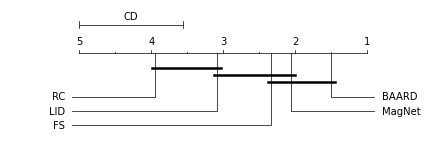

In [26]:
# L-inf: apgd, fgsm, bim

data = df2[(df2['attack'] == 'apgd') | (df2['attack'] == 'bim') | (df2['attack'] == 'fgsm')]
data
acc = pd.concat(
    {d: a.reset_index(drop=True) for d, a in data.groupby('defence')['acc_on_adv']},
    axis=1
)
res_acc = autorank(acc)
plot_stats(res_acc)
plt.savefig('nemenyi_acc_linf.pdf', format='pdf', dpi=1200, bbox_inches='tight')

# fpr = pd.concat(
#     {d: a.reset_index(drop=True) for d, a in data.groupby('defence')['fpr']},
#     axis=1
# )
# res_fpr = autorank(fpr, order='ascending')
# plot_stats(res_fpr)
# plt.savefig('nemenyi_fpr_linf.pdf', format='pdf', dpi=1200, bbox_inches='tight')

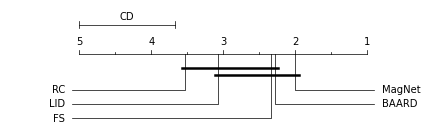

In [27]:
# L-2: apgd2, cw2, boundary, deepfool

data = df2[(df2['attack'] == 'apgd2') | (df2['attack'] == 'cw2') | (df2['attack'] == 'boundary')  | (df2['attack'] == 'deepfool')]
acc = pd.concat(
    {d: a.reset_index(drop=True) for d, a in data.groupby('defence')['acc_on_adv']},
    axis=1
)
res_acc = autorank(acc)
plot_stats(res_acc)
plt.savefig('nemenyi_acc_l2.pdf', format='pdf', dpi=1200, bbox_inches='tight')

# fpr = pd.concat(
#     {d: a.reset_index(drop=True) for d, a in data.groupby('defence')['fpr']},
#     axis=1
# )
# res_fpr = autorank(fpr, order='ascending')
# plot_stats(res_fpr)
# plt.savefig('nemenyi_fpr_l2.pdf', format='pdf', dpi=1200, bbox_inches='tight')